# Caltech 256 Image Dataset | Kaggle


## CNN

### For Google Drive

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import zipfile
local_zip = '/content/drive/MyDrive/Computer_Vision_Duth/imagedb_caltech_2/imagedb_caltech_2.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close() 

In [3]:
train_path = '/content/caltech/imagedb'
test_path = '/content/caltech/imagedb_test'

### Train the model

In [17]:
import zipfile

!rm /content/download
!rm -r /content/imagedb/
!rm -r /content/imagedb_test
!wget https://vc.ee.duth.gr:6960/index.php/s/LyS24AwLJ1eAxFR/download
local_zip = '/content/download'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

train_path = '/content/caltech/imagedb'
test_path = '/content/caltech/imagedb_test'

rm: cannot remove '/content/imagedb/': No such file or directory
rm: cannot remove '/content/imagedb_test': No such file or directory
--2023-01-18 15:08:05--  https://vc.ee.duth.gr:6960/index.php/s/LyS24AwLJ1eAxFR/download
Resolving vc.ee.duth.gr (vc.ee.duth.gr)... 83.212.140.54
Connecting to vc.ee.duth.gr (vc.ee.duth.gr)|83.212.140.54|:6960... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14310142 (14M) [application/zip]
Saving to: ‘download’

download            100%[===================>]  13.65M  4.78MB/s    in 2.9s    

2023-01-18 15:08:10 (4.78 MB/s) - ‘download’ saved [14310142/14310142]



In [18]:
batch_size = 64
epochs = 250
IMG_HEIGHT = 256
IMG_WIDTH = 256
IMG_COLOR = 3
num_of_classes = 5

In [19]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', restore_best_weights=True, patience=25, verbose=1)

# Checkpoints
checkpoint_filepath = '/content/drive/MyDrive/Computer_Vision_Duth/imagedb_caltech_2 Best Model/imagedb_caltech_2.hdf5'

model_checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_loss', mode='min', save_best_only=True)

# Scheduler
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

In [20]:
rescale = 1./255

train_image_generator = ImageDataGenerator(rescale=rescale, 
                                           validation_split=0.2,
                                           width_shift_range=0.1, 
                                           height_shift_range=0.1, 
                                           rotation_range=15,
                                           zoom_range=0.1)

test_image_generator = ImageDataGenerator(rescale=rescale)

train_data_gen = train_image_generator.flow_from_directory(
        directory=train_path,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training', seed=1)

val_data_gen = train_image_generator.flow_from_directory(
        directory=train_path,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation', seed=1)

test_data_gen = test_image_generator.flow_from_directory(
        directory=test_path, 
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Found 388 images belonging to 5 classes.
Found 94 images belonging to 5 classes.
Found 52 images belonging to 5 classes.


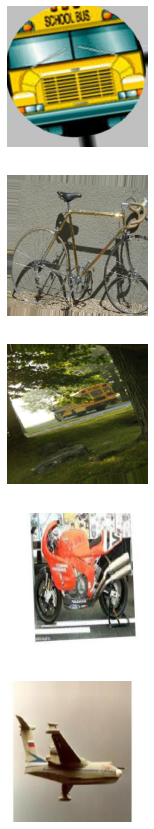

In [21]:
def plotImages(images_arr):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))

    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])

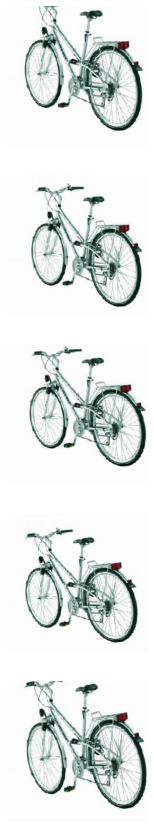

In [22]:
n = 15 # Choose an image
augmented_images = [train_data_gen[0][0][n] for i in range(5)]
plotImages(augmented_images)

In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_diagrams(history, h=20, w=8):
    epochs = len(history.history['loss'])
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(h, w))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_COLOR)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_of_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(x=train_data_gen, 
                    validation_data=val_data_gen, 
                    epochs=epochs, batch_size=batch_size, shuffle=True, callbacks=[early_stopping, model_checkpoint, reduce_lr])

Epoch 1/250
7/7 [==============================] - 18s 2s/step - loss: 1.9031 - accuracy: 0.2242 - val_loss: 1.6084 - val_accuracy: 0.2234 - lr: 0.0010
Epoch 2/250
7/7 [==============================] - 9s 1s/step - loss: 1.6085 - accuracy: 0.1933 - val_loss: 1.6086 - val_accuracy: 0.2234 - lr: 0.0010
Epoch 3/250
7/7 [==============================] - 9s 1s/step - loss: 1.6097 - accuracy: 0.2139 - val_loss: 1.6094 - val_accuracy: 0.2021 - lr: 0.0010
Epoch 4/250
7/7 [==============================] - 9s 1s/step - loss: 1.6093 - accuracy: 0.2139 - val_loss: 1.6088 - val_accuracy: 0.2234 - lr: 0.0010
Epoch 5/250
7/7 [==============================] - 9s 1s/step - loss: 1.6086 - accuracy: 0.2165 - val_loss: 1.6078 - val_accuracy: 0.2234 - lr: 0.0010
Epoch 6/250
7/7 [==============================] - 9s 1s/step - loss: 1.6092 - accuracy: 0.2165 - val_loss: 1.5964 - val_accuracy: 0.2234 - lr: 0.0010
Epoch 7/250
7/7 [==============================] - 9s 1s/step - loss: 1.6069 - accuracy: 0.21

In [ ]:
train_loss, train_acc = model.evaluate(train_data_gen, verbose=2)
print("Train accuracy: " + "{:.2f}".format(train_acc*100) + "%")

7/7 - 6s - loss: 1.5988 - accuracy: 0.2165 - 6s/epoch - 847ms/step
Train accuracy: 21.65%


In [ ]:
test_loss, test_acc = model.evaluate(test_data_gen, verbose=2)
print("Test accuracy: " + "{:.2f}".format(test_acc*100) + "%")

1/1 - 3s - loss: 1.6015 - accuracy: 0.2115 - 3s/epoch - 3s/step
Test accuracy: 21.15%


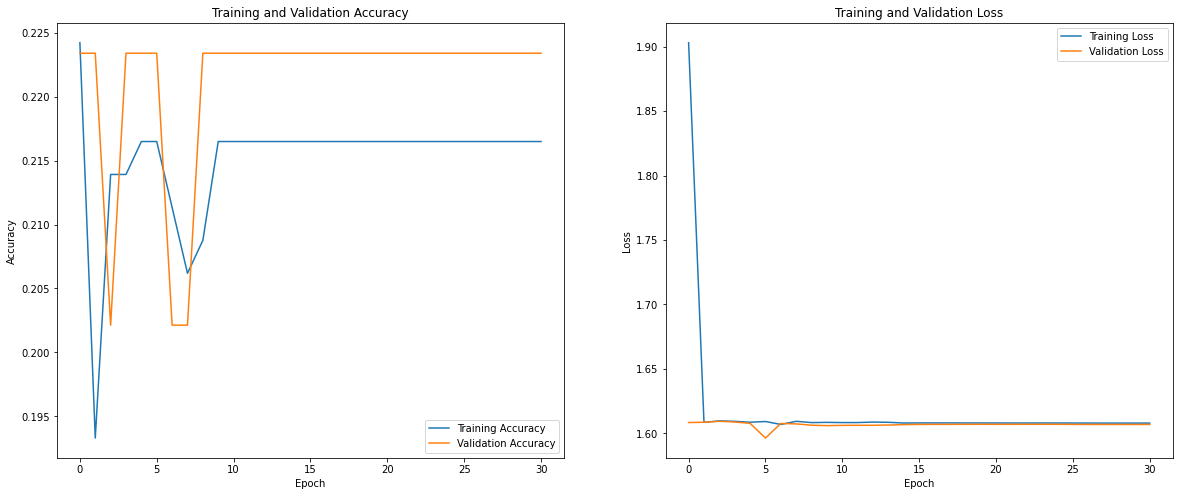

In [ ]:
plot_diagrams(history)

### Load the model

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.models import load_model

# Checkpoints
checkpoint_filepath = '/content/drive/MyDrive/Computer_Vision_Duth/imagedb_caltech_2 Best Model/imagedb_caltech_2.hdf5'

best_model = load_model(checkpoint_filepath)

In [ ]:
import zipfile
local_zip = '/content/drive/MyDrive/Computer_Vision_Duth/imagedb_caltech_2/imagedb_caltech_2.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close() 

In [ ]:
train_path = '/content/caltech/imagedb'
test_path = '/content/caltech/imagedb_test'

In [ ]:
batch_size = 64
epochs = 250
IMG_HEIGHT = 256
IMG_WIDTH = 256
IMG_COLOR = 3
num_of_classes = 34

In [ ]:
rescale = 1./255

train_image_generator = ImageDataGenerator(rescale=rescale, 
                                           validation_split=0.2,
                                           width_shift_range=0.1, 
                                           height_shift_range=0.1, 
                                           rotation_range=15,
                                           zoom_range=0.1)

test_image_generator = ImageDataGenerator(rescale=rescale)

train_data_gen = train_image_generator.flow_from_directory(
        directory=train_path,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training', seed=1)

val_data_gen = train_image_generator.flow_from_directory(
        directory=train_path,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation', seed=1)

test_data_gen = test_image_generator.flow_from_directory(
        directory=test_path, 
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Found 388 images belonging to 5 classes.
Found 94 images belonging to 5 classes.
Found 52 images belonging to 5 classes.


In [ ]:
best_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 252, 252, 32)      9248      
                                                                 
 conv2d_14 (Conv2D)          (None, 250, 250, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 125, 125, 32)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 123, 123, 64)      18496     
                                                                 
 conv2d_16 (Conv2D)          (None, 121, 121, 64)      36928     
                                                      

In [ ]:
from keras.utils.layer_utils import count_params

trainable_params = count_params(best_model.trainable_weights)
non_trainable_params = count_params(best_model.non_trainable_weights)
print("Trainable params:", trainable_params)
print("Non trainable params:", non_trainable_params)

Trainable params: 2084101
Non trainable params: 0


In [ ]:
train_loss, train_acc = best_model.evaluate(train_data_gen, verbose=2)
print("Train accuracy: " + "{:.2f}".format(train_acc*100) + "%")

7/7 - 6s - loss: 1.5986 - accuracy: 0.2165 - 6s/epoch - 866ms/step
Train accuracy: 21.65%


In [ ]:
test_loss, test_acc = best_model.evaluate(test_data_gen, verbose=2)
print("Test accuracy: " + "{:.2f}".format(test_acc*100) + "%")

1/1 - 0s - loss: 1.6015 - accuracy: 0.2115 - 311ms/epoch - 311ms/step
Test accuracy: 21.15%


## Pretrained model

### Train the model

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
local_zip = '/content/drive/MyDrive/Computer_Vision_Duth/imagedb_caltech_2/imagedb_caltech_2.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close() 

In [ ]:
train_path = '/content/caltech/imagedb'
test_path = '/content/caltech/imagedb_test'

In [ ]:
batch_size = 64
epochs = 250
IMG_HEIGHT = 256
IMG_WIDTH = 256
IMG_COLOR = 3
num_of_classes = 5

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', restore_best_weights=True, patience=25, verbose=1)

# Checkpoints
checkpoint_filepath = '/content/drive/MyDrive/Computer_Vision_Duth/Pretrained imagedb_caltech_2 Best Model/caltech_2.hdf5'

model_checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_loss', mode='min', save_best_only=True)

#Scheduler
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

In [ ]:
rescale = 1./255

train_image_generator = ImageDataGenerator(rescale=rescale, 
                                           validation_split=0.2,
                                           width_shift_range=0.1, 
                                           height_shift_range=0.1, 
                                           rotation_range=15,
                                           zoom_range=0.1)

test_image_generator = ImageDataGenerator(rescale=rescale)

train_data_gen = train_image_generator.flow_from_directory(
        directory=train_path,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training', seed=1)

val_data_gen = train_image_generator.flow_from_directory(
        directory=train_path,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation', seed=1)

test_data_gen = test_image_generator.flow_from_directory(
        directory=test_path, 
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Found 388 images belonging to 5 classes.
Found 94 images belonging to 5 classes.
Found 52 images belonging to 5 classes.


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_diagrams(history, h=20, w=8):
    epochs = len(history.history['loss'])
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(h, w))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [ ]:
# Create the base model from the pre-trained model ResNet50
base_model = tf.keras.applications.ResNet50(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_COLOR),
                                               include_top=False,
                                               weights='imagenet')
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
len(base_model.layers)

175

In [ ]:
for i in range(len(base_model.layers)-50): 
  base_model.layers[i].trainable = False

In [ ]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_of_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 131072)            0         
                                                                 
 dense_3 (Dense)             (None, 5)                 655365    
                                                                 
Total params: 24,243,077
Trainable params: 17,605,893
Non-trainable params: 6,637,184
_________________________________________________________________


In [ ]:
history = model.fit(x=train_data_gen, 
                    validation_data=val_data_gen, 
                    epochs=epochs, batch_size=batch_size, shuffle=True, callbacks=[early_stopping, model_checkpoint, reduce_lr])

Epoch 1/250
7/7 [==============================] - 17s 2s/step - loss: 35.3452 - accuracy: 0.2500 - val_loss: 124.8866 - val_accuracy: 0.1809 - lr: 0.0010
Epoch 2/250
7/7 [==============================] - 9s 1s/step - loss: 10.3058 - accuracy: 0.2577 - val_loss: 595.4109 - val_accuracy: 0.1809 - lr: 0.0010
Epoch 3/250
7/7 [==============================] - 9s 1s/step - loss: 7.9842 - accuracy: 0.2113 - val_loss: 14915.0771 - val_accuracy: 0.1809 - lr: 0.0010
Epoch 4/250
7/7 [==============================] - 8s 1s/step - loss: 5.1794 - accuracy: 0.2242 - val_loss: 29862.8828 - val_accuracy: 0.1809 - lr: 0.0010
Epoch 5/250
7/7 [==============================] - 8s 1s/step - loss: 2.2180 - accuracy: 0.3634 - val_loss: 26532.4941 - val_accuracy: 0.1809 - lr: 0.0010
Epoch 6/250
7/7 [==============================] - 8s 1s/step - loss: 1.4200 - accuracy: 0.3918 - val_loss: 20467.4141 - val_accuracy: 0.1809 - lr: 0.0010
Epoch 7/250
7/7 [==============================] - 8s 1s/step - loss: 1

In [ ]:
train_loss, train_acc = model.evaluate(train_data_gen, verbose=2)
print("Train accuracy: " + "{:.2f}".format(train_acc*100) + "%")

7/7 - 6s - loss: 0.1775 - accuracy: 0.9304 - 6s/epoch - 856ms/step
Train accuracy: 93.04%


In [ ]:
test_loss, test_acc = model.evaluate(test_data_gen, verbose=2)
print("Test accuracy: " + "{:.2f}".format(test_acc*100) + "%")

1/1 - 2s - loss: 0.2296 - accuracy: 0.9231 - 2s/epoch - 2s/step
Test accuracy: 92.31%


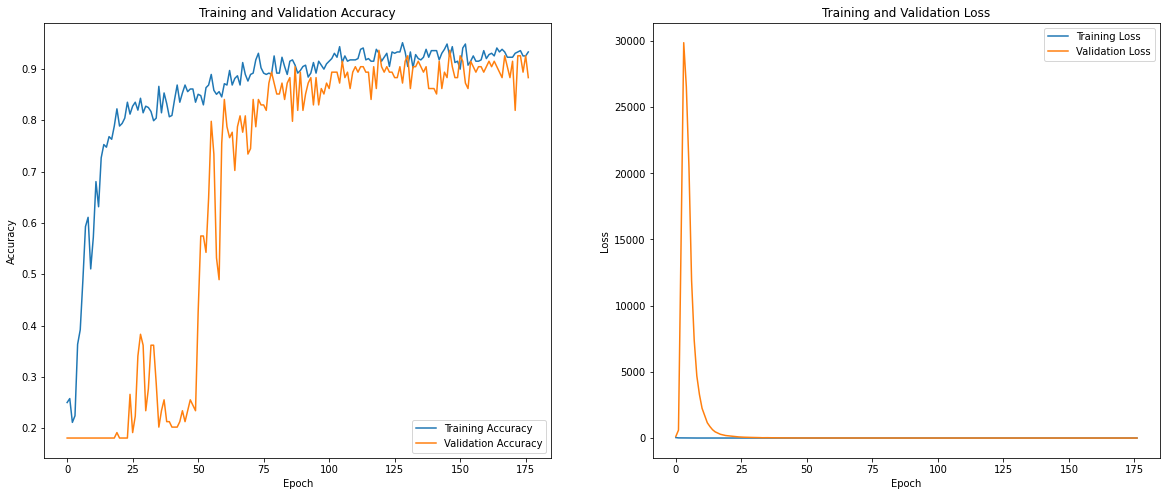

In [ ]:
plot_diagrams(history)

### Load the model

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.models import load_model

# Checkpoints
checkpoint_filepath = '/content/drive/MyDrive/Computer_Vision_Duth/Pretrained imagedb_caltech_2 Best Model/caltech_2.hdf5'

best_model = load_model(checkpoint_filepath)

In [ ]:
import zipfile
local_zip = '/content/drive/MyDrive/Computer_Vision_Duth/imagedb_caltech_2/imagedb_caltech_2.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
train_path = '/content/caltech/imagedb'
test_path = '/content/caltech/imagedb_test'

In [ ]:
batch_size = 64
epochs = 250
IMG_HEIGHT = 256
IMG_WIDTH = 256
IMG_COLOR = 3
num_of_classes = 34

In [ ]:
rescale = 1./255

train_image_generator = ImageDataGenerator(rescale=rescale, 
                                           validation_split=0.2,
                                           width_shift_range=0.1, 
                                           height_shift_range=0.1, 
                                           rotation_range=15,
                                           zoom_range=0.1)

test_image_generator = ImageDataGenerator(rescale=rescale)

train_data_gen = train_image_generator.flow_from_directory(
        directory=train_path,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training', seed=1)

val_data_gen = train_image_generator.flow_from_directory(
        directory=train_path,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation', seed=1)

test_data_gen = test_image_generator.flow_from_directory(
        directory=test_path, 
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Found 388 images belonging to 5 classes.
Found 94 images belonging to 5 classes.
Found 52 images belonging to 5 classes.


In [ ]:
best_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 131072)            0         
                                                                 
 dense_3 (Dense)             (None, 5)                 655365    
                                                                 
Total params: 24,243,077
Trainable params: 17,605,893
Non-trainable params: 6,637,184
_________________________________________________________________


In [ ]:
from keras.utils.layer_utils import count_params

trainable_params = count_params(best_model.trainable_weights)
non_trainable_params = count_params(best_model.non_trainable_weights)
print("Trainable params:", trainable_params)
print("Non trainable params:", non_trainable_params)

Trainable params: 17605893
Non trainable params: 6637184


In [ ]:
train_loss, train_acc = best_model.evaluate(train_data_gen, verbose=2)
print("Train accuracy: " + "{:.2f}".format(train_acc*100) + "%")

7/7 - 7s - loss: 0.1840 - accuracy: 0.9330 - 7s/epoch - 1s/step
Train accuracy: 93.30%


In [ ]:
test_loss, test_acc = best_model.evaluate(test_data_gen, verbose=2)
print("Test accuracy: " + "{:.2f}".format(test_acc*100) + "%")

1/1 - 0s - loss: 0.2296 - accuracy: 0.9231 - 377ms/epoch - 377ms/step
Test accuracy: 92.31%
